In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Data/LD2011_2014.txt', sep=';', decimal=',', parse_dates=[0])
df.rename(columns={df.columns[0]: 'timestamp'}, inplace=True)
df.set_index('timestamp', inplace=True)

In [3]:
df_monthly = df.resample('M').sum()

/tmp/ipykernel_364/1878842578.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').sum()


In [4]:
customer_monthly_matrix = df_monthly.T

In [5]:
customer_monthly_matrix.shape

(370, 49)

In [6]:
customer_monthly_matrix

timestamp,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,...,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31
MT_001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.361675e+03,1.408629e+04,6.431472e+03,6.771574e+03,4.553934e+04,2.372208e+04,4.842640e+03,5.705584e+03,6.298223e+03,2.538071
MT_002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.956757e+04,7.626245e+04,7.753627e+04,9.664936e+04,9.639331e+04,8.522902e+04,7.679872e+04,6.701565e+04,6.799075e+04,19.914651
MT_003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.933102e+03,5.107732e+03,4.913119e+03,5.099044e+03,5.092963e+03,4.927020e+03,5.097307e+03,4.929626e+03,4.927889e+03,1.737619
MT_004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.464146e+05,3.232642e+05,3.103455e+05,3.255081e+05,3.191850e+05,3.123902e+05,3.235244e+05,3.621321e+05,4.231585e+05,178.861789
MT_005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.352573e+05,1.154732e+05,1.094634e+05,1.456402e+05,1.224390e+05,1.204134e+05,1.308171e+05,1.665829e+05,2.092098e+05,84.146341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MT_366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.401170e+04,3.128964e+04,3.788239e+04,3.582914e+04,3.664073e+04,3.460796e+04,3.829140e+04,2.861791e+04,3.176243e+04,4.095963
MT_367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.685029e+06,1.737992e+06,1.725033e+06,1.877976e+06,1.849248e+06,1.755262e+06,1.819917e+06,1.633774e+06,1.646143e+06,628.621598
MT_368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.575960e+05,3.659633e+05,3.519699e+05,3.677813e+05,3.579098e+05,3.555576e+05,3.844708e+05,3.506294e+05,3.686661e+05,131.886477
MT_369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.212886e+06,2.376270e+06,2.426892e+06,2.677232e+06,2.792532e+06,2.488573e+06,2.522830e+06,2.187608e+06,2.254207e+06,673.020528


In [7]:
features = pd.DataFrame(index=customer_monthly_matrix.index)

In [10]:
features['Avg_Monthly_kWh'] = customer_monthly_matrix.mean(axis=1)

# Feature 2: Variability (Does usage change a lot? e.g., Seasonal factories vs Homes)
features['Std_Monthly_kWh'] = customer_monthly_matrix.std(axis=1)

# Feature 3: Maximum Monthly usage (Peak capacity)
features['Max_Monthly_kWh'] = customer_monthly_matrix.max(axis=1)

In [11]:
features.head()

,Avg_Monthly_kWh,Std_Monthly_kWh,Max_Monthly_kWh
MT_001,11365.844815,12931.083628,46880.710660
MT_002,59447.020060,37121.308026,106814.366999
MT_003,8353.268675,21156.638643,138477.845352
MT_004,235242.201759,148314.728012,423158.536585
MT_005,106595.445495,70194.918610,209907.317073


In [12]:
features_log = np.log1p(features)

In [13]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_log)

In [14]:
kmeans = KMeans(n_clusters=3, random_state=42)
features['Cluster'] = kmeans.fit_predict(features_scaled)

In [15]:
cluster_means = features.groupby('Cluster')['Avg_Monthly_kWh'].mean().sort_values()
mapping = {old: new for new, old in enumerate(cluster_means.index)}
features['Cluster'] = features['Cluster'].map(mapping)

In [17]:
def label_cluster(row):
    if row['Cluster'] == 0:
        return "Residential / Small Business"
    elif row['Cluster'] == 1:
        return "Medium Commercial"
    else:
        return "Large Industrial"

features['Category'] = features.apply(label_cluster, axis=1)

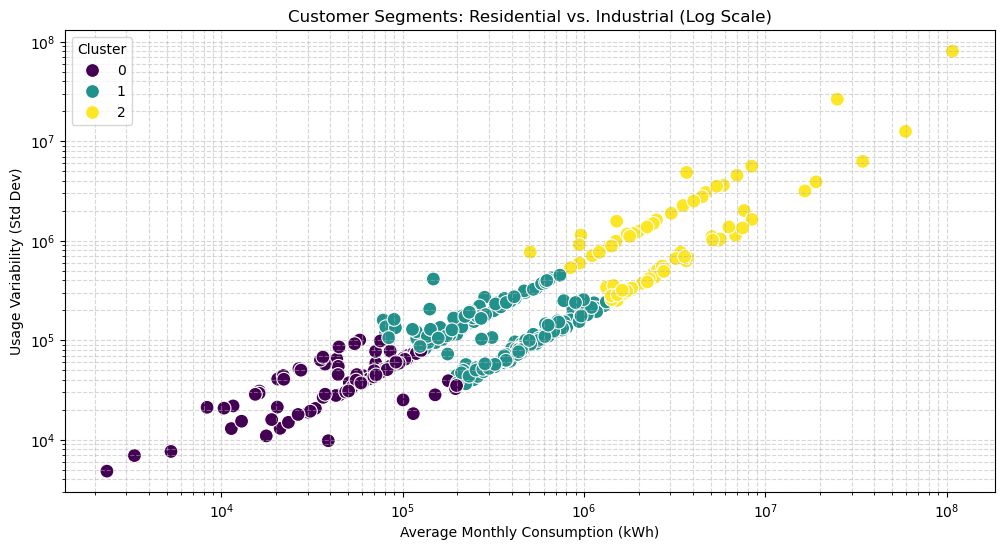

In [21]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=features, x='Avg_Monthly_kWh', y='Std_Monthly_kWh', 
                hue='Cluster', palette='viridis', s=100)

plt.xscale('log') # Log scale because industry usage is huge
plt.yscale('log')
plt.title('Customer Segments: Residential vs. Industrial (Log Scale)')
plt.xlabel('Average Monthly Consumption (kWh)')
plt.ylabel('Usage Variability (Std Dev)')
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.savefig('clusters.png', dpi=300, bbox_inches='tight')
plt.show()